0. VERİ SETİNİN HAZIRLANMASI
   
Veri Seti ve Adresi: 

Spotify Tracks Dataset : https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data



In [1]:
#kullanacaagımız kütüphaneleri yükleyelim
#pandas ve numpy
import pandas as pd
import numpy as np

#görsellestirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns 

#diğer örnek görsellestirme kütüphaneleri
#ggplot
#Bokeh
#Plotly



In [2]:
df_ = pd.read_csv(filepath_or_buffer = '/kaggle/input/-spotify-tracks-dataset/dataset.csv')
df = df_.copy()

In [3]:
#Veri setinde rastgele eksik veriler oluşturalım

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                            missing_rate: float = 0.05,
                            seed: random = 42) ->pd.DataFrame:


    #get copy of datarame
    df_missing = dataframe.copy()

    #obtain sşze of data frame and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    #Set seed

    if seed:
        random.seed(seed)

    #get random row and column indexes to turn them NaN 
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0]-1)
        col_idx = random.randint(0, dataframe.shape[1]-1)

        df_missing.iat[row_idx, col_idx] = np.nan
    return df_missing

df = add_random_missing_values(dataframe = df, 
                              missing_rate = 0.03)
                            

/tmp/ipykernel_17/3584719152.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_missing.iat[row_idx, col_idx] = np.nan


1.VERİYE İLK BAKIŞ

In [4]:
#Veri setinin ilk 3 gözlemini görelim.
df.head(n = 3)

#sondan 3 gözlem için tail() metodu kullanılabilir
#d.tail(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.461,...,-6.746,NaN,0.1430,0.0322,0.000001,0.358,0.715,87.917,4.0,acoustic
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.166,...,-17.235,1.0,0.0763,0.9240,0.000006,0.101,0.267,77.489,4.0,acoustic
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.359,...,-9.734,1.0,0.0557,0.2100,0.000000,0.117,0.120,76.332,4.0,acoustic


Veri setindeki satır ve sütun sayılarını .shape kullanarak görebiliriz

In [5]:
df.shape #-> (satır,sütun)

(114000, 21)

Veri setindeki değişkenlerin isimlerine ulaşmak istersek df.columns kullanabiliriz

In [6]:
#veri setindeki kolonları yazdırır
print(list(df.columns),'\n')

#len() fonksiyonuyla toplam kolon sayısına ulaşıyoruz
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

#columns hangi veri tipi döndürdüğüne bakmak için :
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre'] 

Veri seti içerisinde toplam 21 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



info() metodu kullanarak, veri setine ait yapısal bilgilere ulaşabiliriz.
Bu noktada elimizdeki kolonların veri tiplerinin doğru olup olmadığını, kayıt sayılarını , kolon isimlerini mutlaka kontrol etmeliyiz.

In [7]:
df.info()  #non-null:eksik olmayan değer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        110642 non-null  float64
 1   track_id          110674 non-null  object 
 2   artists           110656 non-null  object 
 3   album_name        110599 non-null  object 
 4   track_name        110614 non-null  object 
 5   popularity        110734 non-null  float64
 6   duration_ms       110726 non-null  float64
 7   explicit          110643 non-null  object 
 8   danceability      110659 non-null  float64
 9   energy            110626 non-null  float64
 10  key               110640 non-null  float64
 11  loudness          110648 non-null  float64
 12  mode              110549 non-null  float64
 13  speechiness       110631 non-null  float64
 14  acousticness      110597 non-null  float64
 15  instrumentalness  110584 non-null  float64
 16  liveness          11

Sadece elimizdeki değişkenleri görmek ve tiplerini görüntülemek istersek, dtypes kullanabiliriz.

In [8]:
df.dtypes

Unnamed: 0          float64
track_id             object
artists              object
album_name           object
track_name           object
popularity          float64
duration_ms         float64
explicit             object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
track_genre          object
dtype: object

Elimizdeki veri setinde kategorik ve numerik özellikler birlikte bulunmakta. Bu özellikleri ayırmak ve farklı değişken listelerinde kullanmak bizim için faydaalı olabilir, özellikle kolon bazlı işler yapmak istersek bu listeleri bir filtre olarak kullanabiliriz.
UYARI: Veri setinin ham halinde, kolonların veri tipleri her zaman olması gerektiği haliyle olmayabilir. Kategorik ve numerik kolonları ayırırken öncelikle her değişkenin doğru veri tipinde olduğunden emin ol.

In [9]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

#yukarıdakı listeleri list comprehenion kullanarak yap

In [10]:
categorical_features, numerical_features

(['track_id',
  'artists',
  'album_name',
  'track_name',
  'explicit',
  'track_genre'],
 ['Unnamed: 0',
  'popularity',
  'duration_ms',
  'danceability',
  'energy',
  'key',
  'loudness',
  'mode',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo',
  'time_signature'])

Örneğin veri tipi Object olan kategorik değişkenlerin veri tipini Categorical olarak değiştirmek istersek, basitçe kolon isimleriüzerinde bir döngü kurarak filtreleme yapabiliriz.
Döngü içerisinde, mevcut kolon ismi categorical_featuresiçerisinde bulunuyorsa, o zaman o kolonun tipini Categorical olarak değiştirelim, bulunmuyorsabir işlem yapmayalım.

In [11]:
for col in df.columns:
    if col in categorical_features:
        
        df[col] = pd.Categorical(df[col])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        110642 non-null  float64 
 1   track_id          110674 non-null  category
 2   artists           110656 non-null  category
 3   album_name        110599 non-null  category
 4   track_name        110614 non-null  category
 5   popularity        110734 non-null  float64 
 6   duration_ms       110726 non-null  float64 
 7   explicit          110643 non-null  category
 8   danceability      110659 non-null  float64 
 9   energy            110626 non-null  float64 
 10  key               110640 non-null  float64 
 11  loudness          110648 non-null  float64 
 12  mode              110549 non-null  float64 
 13  speechiness       110631 non-null  float64 
 14  acousticness      110597 non-null  float64 
 15  instrumentalness  110584 non-null  float64 
 16  li

In [13]:
df['track_genre'][:3]

0    acoustic
1    acoustic
2    acoustic
Name: track_genre, dtype: category
Categories (114, object): ['acoustic', 'afrobeat', 'alt-rock', 'alternative', ..., 'trance', 'trip-hop', 'turkish', 'world-music']

In [14]:
df.describe().T #->.T eklentisi elde edeceğiniz çıktıyı transpoze eder
#df.describe(include = "all")-> veri setindeki tüm değişkenleri dahil etmek için iclude parametresine "all" değerini verebiliriz.

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,110642.0,57011.701976,32912.912897,0.000,28501.2500,57014.500000,85520.7500,113999.000
popularity,110734.0,33.234472,22.307304,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,110726.0,227964.627540,107001.540874,0.000,174066.0000,212909.000000,261519.0000,5237295.000
danceability,110659.0,0.566812,0.173618,0.000,0.4560,0.580000,0.6950,0.985
energy,110626.0,0.641429,0.251481,0.000,0.4720,0.685000,0.8540,1.000
key,110640.0,5.309716,3.559819,0.000,2.0000,5.000000,8.0000,11.000
loudness,110648.0,-8.259733,5.034470,-49.531,-10.0120,-7.004000,-5.0000,4.532
mode,110549.0,0.637618,0.480691,0.000,0.0000,1.000000,1.0000,1.000
speechiness,110631.0,0.084545,0.105461,0.000,0.0359,0.048900,0.0845,0.965
acousticness,110597.0,0.314974,0.332527,0.000,0.0169,0.169000,0.5980,0.996


2.EKSİK VERİ ANALİZİ

Eksik veri analizi ile, veri stimizdeki eksik verileri tespit edip bu durumu uygun bir şekilde düzeltmeyi hedefleriz.
Veri seti içinde eksik değerler bulunması yapısal bir bozukluğa işaret eder ve mutlaka uygun yöntemlerle ele alınmalıdır.

2.1 Eksik Verilerin Gözlemlenmesi

In [15]:
df.isna().sum() # -> isna() metodu yerine isnull() metodu da kullanılabilir.
#ALIŞTIRMA: Her bir değişken için, o değişkendeki eksik değer sayısının toplam kayıt sayısının % kaçı old. bulunuz.

Unnamed: 0          3358
track_id            3326
artists             3344
album_name          3401
track_name          3386
popularity          3266
duration_ms         3274
explicit            3357
danceability        3341
energy              3374
key                 3360
loudness            3352
mode                3451
speechiness         3369
acousticness        3403
instrumentalness    3416
liveness            3390
valence             3406
tempo               3418
time_signature      3321
track_genre         3448
dtype: int64

Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz.

In [16]:
df.isna().sum().sum()

70761

In [17]:
#eksik olmayan değerlerin sayısı:
df.notnull().sum()

Unnamed: 0          110642
track_id            110674
artists             110656
album_name          110599
track_name          110614
popularity          110734
duration_ms         110726
explicit            110643
danceability        110659
energy              110626
key                 110640
loudness            110648
mode                110549
speechiness         110631
acousticness        110597
instrumentalness    110584
liveness            110610
valence             110594
tempo               110582
time_signature      110679
track_genre         110552
dtype: int64

In [18]:
##None ve NaN değerleri arasındaki fark nedir?
##....

In [19]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan , {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 2323239 adet eksik olmayan , 70761 eksik gözlem var.


In [20]:
#veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.461,...,-6.746,NaN,0.1430,0.03220,0.000001,0.3580,0.7150,87.917,4.0,acoustic
4,4.0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,NaN,82.0,198853.0,False,0.618,0.443,...,-9.681,1.0,0.0526,0.46900,0.000000,0.0829,0.1670,119.949,4.0,acoustic
6,NaN,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74.0,229400.0,False,0.407,0.147,...,-8.822,1.0,0.0355,0.85700,0.000003,0.0913,0.0765,141.284,3.0,NaN
7,7.0,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80.0,242946.0,False,0.703,0.444,...,NaN,1.0,0.0417,0.55900,0.000000,0.0973,0.7120,150.960,4.0,acoustic
9,9.0,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56.0,205594.0,False,0.442,0.632,...,-6.770,1.0,0.0295,0.42600,0.004190,0.0735,0.1960,78.899,4.0,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113983,113983.0,6X6wIzuxsh7GVNMPz1xTNa,Hillsong Worship,No Other Name,Depths,37.0,377697.0,False,0.363,0.462,...,-8.232,1.0,NaN,0.00887,0.000009,0.7060,0.0687,80.003,4.0,world-music
113984,113984.0,0PjyOURxQ6wiHaBYXf53G2,Tenth Avenue North,The Light Meets The Dark,Healing Begins,44.0,NaN,False,0.541,0.583,...,-7.047,1.0,NaN,0.01420,0.000000,0.1020,0.2760,96.008,4.0,world-music
113992,113992.0,3FjOBB4EyIXHYUtSgrIdY9,Jesus Culture,Revelation Songs,NaN,38.0,312566.0,False,0.475,0.860,...,-4.722,1.0,0.0421,0.00650,0.000002,0.2460,0.4270,NaN,4.0,NaN
113996,113996.0,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22.0,385000.0,False,0.174,0.117,...,-18.318,0.0,NaN,0.99400,0.976000,0.1050,0.0350,85.239,4.0,world-music


In [21]:
#hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.924,0.000006,0.101,0.267,77.489,4.0,acoustic
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.210,0.000000,0.117,0.120,76.332,4.0,acoustic
3,3.0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.905,0.000071,0.132,0.143,181.740,3.0,acoustic
5,5.0,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58.0,214240.0,False,0.688,0.4810,...,-8.807,1.0,0.1050,0.289,0.000000,0.189,0.666,98.017,4.0,acoustic
8,8.0,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74.0,189613.0,False,0.625,0.4140,...,-8.700,1.0,0.0369,0.294,0.000000,0.151,0.669,130.088,4.0,acoustic


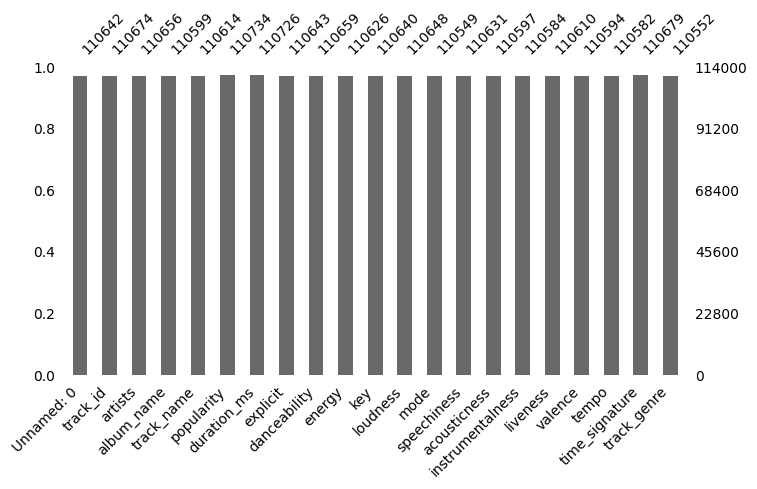

In [22]:
#!pip insall missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemek lazım.

import missingno as msno 

msno.bar( df = df, 
        figsize = (8,4),
        fontsize = 10);

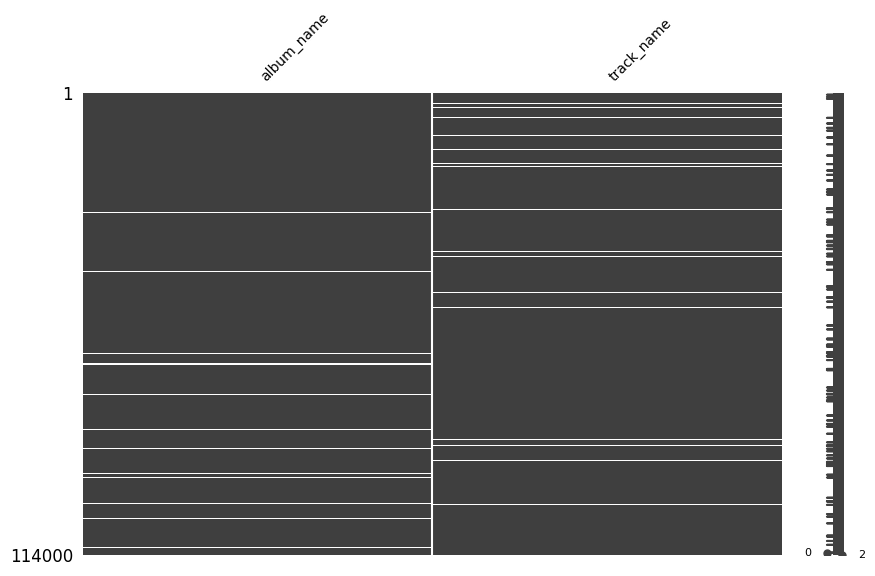

In [23]:
#msno.matric() deişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla 
#tespit etmek için kullanılabilir. Beyaz bölüm eksik olan siyah bölümler eksik olmayan bölümleri gösterir.
msno.matrix(df = df[['album_name','track_name']],
           figsize = (10,6),
           fontsize = 10);

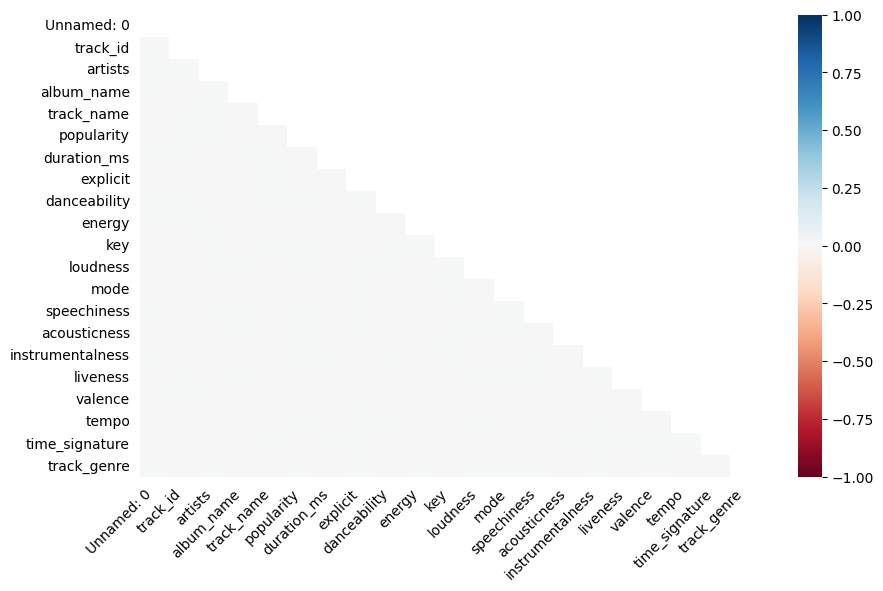

In [24]:
#Nullity Correlation (Heatmap)
#1'e ne kadar yakınsa, ilişki ihtimali o kadar yükesek.
#0 ise birbirlerini etkileyen bir durum yok.

msno.heatmap(df = df,
            figsize = (10,6),
            fontsize = 10);

2.2 Yöntem 1: Eksik Verilerin Silinmesi
Veri setinde bulunan eksik verilere müdahale yöntemlerinden birisi, eksik verilerin silinmesidir. Uygulaması oldukça kolay bir yöntem olsa da eksik verileri silmeden önce dikkat edilmesi gereken önemli hususlar vardır.1.

Eksik bir verinin bulunduğu gözlemi silmeya karar verebilmek için, bu eksikliğin doğal olmayan bir şekilde ortaya çıktığından emin olmamız gerekir. Örneğin elimizdeki bir araç veri setinde elektrikli araçlar için motor hacmi kolonunda Na değer bulunması doğal bir eksikliğe işaret eder. Bu durumda silme işlemi yerine uygun bir şekilde doldurmak tercih edilebilir2..

Eksik veriler veri setinde kayda değer bir yüzdeyi oluşturuyorsa, eksik verilerin silinmesi durumunda veri setindeki birçok gözlemi kaybedeceğimiz unutulmamalıdır. Bu durumda veri seti içerisinde bize bilgi sağlayabilecek birçok veriyi de kaybetmiş olacağız. Verinin olabildiğince fazla olması, hem analitik yöntemler hem de makine öğrenmesi yöntemleri için oldukça önemli olduğuna göre, veri setinden olabildiğince az kayıp verecek yöntemler denemeliyiz.

In [25]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı kullanılmalı veya atama yapılmalıdır.

df.dropna(inplace = False)[:5]
#df = df.dropna()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.924,0.000006,0.101,0.267,77.489,4.0,acoustic
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.210,0.000000,0.117,0.120,76.332,4.0,acoustic
3,3.0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.905,0.000071,0.132,0.143,181.740,3.0,acoustic
5,5.0,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58.0,214240.0,False,0.688,0.4810,...,-8.807,1.0,0.1050,0.289,0.000000,0.189,0.666,98.017,4.0,acoustic
8,8.0,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74.0,189613.0,False,0.625,0.4140,...,-8.700,1.0,0.0369,0.294,0.000000,0.151,0.669,130.088,4.0,acoustic


In [26]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')[:5]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,-6.746,NaN,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,3.0,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,4.0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,NaN,82.0,198853.0,False,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


In [27]:
# Değişken bazında silmek için;
df.dropna(axis = 1)

""
0
1
2
3
4
...
113995
113996
113997
113998


2.3 Yöntem 2: Eksik Verilerin Doldurulması
Eksik verilerin doldurulması kararı, silinmesi işleminde olduğu gibi hassas ve bilinçli bir şekilde değerlendirilmesi gereken bir karardır. Zira doldurma işlemi veride gürültü (noise) oluşturabilir ve verinin istatistiksel olarak güvenilirliğini zedeleyebilir. Analitik durumlar içinse yanlış bilgi çıkarımlarına sebebiyet verebilir. Bu nedenle en sağlıklı doldurma kararının alındığı durumlarda dahi bu yanlılık durumu mutlaka göz önünde bulundurulmalıdır.

In [28]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0.0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.461,...,-6.746,NaN,0.1430,0.0322,0.000001,0.358,0.715,87.917,4.0,acoustic
1,1.0,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.166,...,-17.235,1.0,0.0763,0.9240,0.000006,0.101,0.267,77.489,4.0,acoustic
2,2.0,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.359,...,-9.734,1.0,0.0557,0.2100,0.000000,0.117,0.120,76.332,4.0,acoustic


In [29]:
df_fillna.isna().sum()

Unnamed: 0          3358
track_id            3326
artists             3344
album_name          3401
track_name          3386
popularity          3266
duration_ms         3274
explicit            3357
danceability        3341
energy              3374
key                 3360
loudness            3352
mode                3451
speechiness         3369
acousticness        3403
instrumentalness    3416
liveness            3390
valence             3406
tempo               3418
time_signature      3321
track_genre         3448
dtype: int64

2.3.1 Sayısal Değişkenlerin Doldurulması

In [30]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_popularity = df_fillna['popularity'].mean()

df_fillna['popularity'].fillna(value = mean_popularity, inplace = True)

df_fillna.isna().sum()


/tmp/ipykernel_17/2732627382.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['popularity'].fillna(value = mean_popularity, inplace = True)


Unnamed: 0          3358
track_id            3326
artists             3344
album_name          3401
track_name          3386
popularity             0
duration_ms         3274
explicit            3357
danceability        3341
energy              3374
key                 3360
loudness            3352
mode                3451
speechiness         3369
acousticness        3403
instrumentalness    3416
liveness            3390
valence             3406
tempo               3418
time_signature      3321
track_genre         3448
dtype: int64

In [31]:
df_fillna.isna().sum()

Unnamed: 0          3358
track_id            3326
artists             3344
album_name          3401
track_name          3386
popularity             0
duration_ms         3274
explicit            3357
danceability        3341
energy              3374
key                 3360
loudness            3352
mode                3451
speechiness         3369
acousticness        3403
instrumentalness    3416
liveness            3390
valence             3406
tempo               3418
time_signature      3321
track_genre         3448
dtype: int64

2.3.1 Sayısal Değişkenlerin Doldurulması

In [32]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_danceability = df_fillna['danceability'].mean()

df_fillna['danceability'].fillna(value = mean_danceability, inplace = True)

df_fillna.isna().sum()

/tmp/ipykernel_17/583210911.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['danceability'].fillna(value = mean_danceability, inplace = True)


Unnamed: 0          3358
track_id            3326
artists             3344
album_name          3401
track_name          3386
popularity             0
duration_ms         3274
explicit            3357
danceability           0
energy              3374
key                 3360
loudness            3352
mode                3451
speechiness         3369
acousticness        3403
instrumentalness    3416
liveness            3390
valence             3406
tempo               3418
time_signature      3321
track_genre         3448
dtype: int64

In [33]:
# Doldurma işleminin döngüyle yapılması
to_be_filled = numerical_features[1:]

for col in to_be_filled:
    df_fillna[col].fillna(df[col].mean(), inplace = True)

/tmp/ipykernel_17/2093098731.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna[col].fillna(df[col].mean(), inplace = True)


In [34]:
df_fillna.isna().sum()

Unnamed: 0          3358
track_id            3326
artists             3344
album_name          3401
track_name          3386
popularity             0
duration_ms            0
explicit            3357
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
track_genre         3448
dtype: int64

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,110642.0,57011.701976,32912.912897,0.000,28501.2500,57014.500000,85520.7500,113999.000
popularity,110734.0,33.234472,22.307304,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,110726.0,227964.627540,107001.540874,0.000,174066.0000,212909.000000,261519.0000,5237295.000
danceability,110659.0,0.566812,0.173618,0.000,0.4560,0.580000,0.6950,0.985
energy,110626.0,0.641429,0.251481,0.000,0.4720,0.685000,0.8540,1.000
key,110640.0,5.309716,3.559819,0.000,2.0000,5.000000,8.0000,11.000
loudness,110648.0,-8.259733,5.034470,-49.531,-10.0120,-7.004000,-5.0000,4.532
mode,110549.0,0.637618,0.480691,0.000,0.0000,1.000000,1.0000,1.000
speechiness,110631.0,0.084545,0.105461,0.000,0.0359,0.048900,0.0845,0.965
acousticness,110597.0,0.314974,0.332527,0.000,0.0169,0.169000,0.5980,0.996


Doldurma işlemini mean yerine median değer ile de gerçekleştirebiliriz, ancak bunu kuyruklu (skewed) dağılımlarda yapmayı tercih ediyoruz.

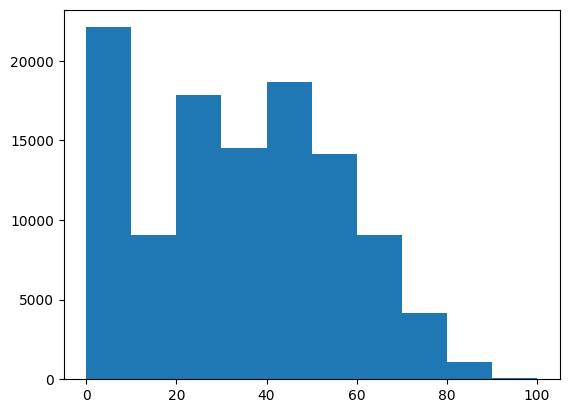

In [36]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(df['popularity'])
plt.show()

2.3.2 Kategorik Değişkenlerin Doldurulması

In [37]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# track_name değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['track_name'].isna().sum()

# track_name değişkeninde en çok tekrar eden değeri(mode) alalım.
track_name_mode = df_fillna['track_name'].mode()

# work_setting değişkenini mode değeri ile dolduralım.
df_fillna['track_name'] = df_fillna['track_name'].fillna(value = track_name_mode[0])

# track_name değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

Unnamed: 0          3358
track_id            3326
artists             3344
album_name          3401
track_name             0
popularity             0
duration_ms            0
explicit            3357
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
track_genre         3448
dtype: int64

In [38]:
df_fillna[["album_name"]][:20]

,album_name
0,Comedy
1,Ghost (Acoustic)
2,To Begin Again
3,Crazy Rich Asians (Original Motion Picture Sou...
4,Hold On
5,Days I Will Remember
6,Is There Anybody Out There?
7,We Sing. We Dance. We Steal Things.
8,We Sing. We Dance. We Steal Things.
9,Hunger


In [39]:
# Önceki değer ile doldurma işlemi
df_fillna["album_name"].fillna(method = "bfill")

/tmp/ipykernel_17/161892128.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["album_name"].fillna(method = "bfill")


0                                                    Comedy
1                                          Ghost (Acoustic)
2                                            To Begin Again
3         Crazy Rich Asians (Original Motion Picture Sou...
4                                                   Hold On
                                ...                        
113995    #mindfulness - Soft Rain for Mindful Meditatio...
113996    #mindfulness - Soft Rain for Mindful Meditatio...
113997                                              Best Of
113998                                    Change Your World
113999                                       Miss Perfumado
Name: album_name, Length: 114000, dtype: category
Categories (45727, object): ['! ! ! ! ! Whispers ! ! ! ! !', '! ! ! ! 300 Sounds of the Ocean ! ! ! !', '! ! % > (( Shelter )) < % ! !', '! !"#Reboot#"! !', ..., '공감 (Empathy) - The 1st Mini Album', '당신이 잠든 사이에 Pt. 1 Original Television Soundtrack', '당신이 잠든 사이에 Pt. 2 Original Television So

In [40]:
# Sonraki değer ile doldurma işlemi
df_fillna["album_name"].fillna(method = "ffill")

/tmp/ipykernel_17/2416085816.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["album_name"].fillna(method = "ffill")


0                                                    Comedy
1                                          Ghost (Acoustic)
2                                            To Begin Again
3         Crazy Rich Asians (Original Motion Picture Sou...
4                                                   Hold On
                                ...                        
113995    #mindfulness - Soft Rain for Mindful Meditatio...
113996    #mindfulness - Soft Rain for Mindful Meditatio...
113997                                              Best Of
113998                                    Change Your World
113999                                       Miss Perfumado
Name: album_name, Length: 114000, dtype: category
Categories (45727, object): ['! ! ! ! ! Whispers ! ! ! ! !', '! ! ! ! 300 Sounds of the Ocean ! ! ! !', '! ! % > (( Shelter )) < % ! !', '! !"#Reboot#"! !', ..., '공감 (Empathy) - The 1st Mini Album', '당신이 잠든 사이에 Pt. 1 Original Television Soundtrack', '당신이 잠든 사이에 Pt. 2 Original Television So

2.3.3 Kategorik Kırılım İle Doldurma İşlemi
Burada basitçe mean ve median değerler ile doldurma işlemi yapmış olsak da, eksik veri durumunu bu kadar basit bir şekilde ele almak her zaman doğru olmayacaktır. Bu tarz basit doldurma işlemleri hızlı bir çözüm olarak ele alınmalıdır. Daha analitik bir yaklaşım için veri içerisinde benzetimler uygulayarak doldurma işlemlerini buna göre gerçekleştirebiliriz.

Örneğin elimizdeki salary kolonunu basitçe mean değer ile doldurmuştuk. Ancak biz biliyoruz ki elimizde job_title isimli bir kolon var ve bu kolonda farklı pozisyonlar yer almakta. Bu durumda örneğin Data Engineer pozisyonuna ait eksik bir maaş verisini, veri setimizdeki Data Engineer pozisyonlarına ait maaşların ortalama (veya median) değeriyle doldurmamız daha doğru bir yaklaşım olacaktır. Çünkü farklı pozisyonların farklı maaş ortalamaları olacağı için, eksik maaş verisini o kaydın ait olduğu grubun istatistiksel değerine göre doldurmak daha doğrudur.

In [41]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

Unnamed: 0          3358
track_id            3326
artists             3344
album_name          3401
track_name          3386
popularity          3266
duration_ms         3274
explicit            3357
danceability        3341
energy              3374
key                 3360
loudness            3352
mode                3451
speechiness         3369
acousticness        3403
instrumentalness    3416
liveness            3390
valence             3406
tempo               3418
time_signature      3321
track_genre         3448
dtype: int64

In [42]:
# Bu kodun ne yaptığını kodu çalıştırarak keşfedin.

#loudness_mean_time_signature_df = df_categorical_fillna.groupby("loudness", observed = False)["time_signature"].mean().to_frame()

In [43]:
df_categorical_fillna["time_signature"].fillna(value = df_categorical_fillna.groupby("loudness")["time_signature"].transform("mean"),
                                       inplace = True)

/tmp/ipykernel_17/734057794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical_fillna["time_signature"].fillna(value = df_categorical_fillna.groupby("loudness")["time_signature"].transform("mean"),


In [44]:
df_categorical_fillna.isna().sum()

Unnamed: 0          3358
track_id            3326
artists             3344
album_name          3401
track_name          3386
popularity          3266
duration_ms         3274
explicit            3357
danceability        3341
energy              3374
key                 3360
loudness            3352
mode                3451
speechiness         3369
acousticness        3403
instrumentalness    3416
liveness            3390
valence             3406
tempo               3418
time_signature       252
track_genre         3448
dtype: int64

In [45]:
df_categorical_fillna[df_categorical_fillna[["loudness", "time_signature"]].isna().all(axis=1)][["loudness", "time_signature"]]

,loudness,time_signature
750,NaN,NaN
772,NaN,NaN
1096,NaN,NaN
1312,NaN,NaN
1400,NaN,NaN
...,...,...
109982,NaN,NaN
111012,NaN,NaN
112868,NaN,NaN
112883,NaN,NaN


In [46]:
df_categorical_fillna[df_categorical_fillna['time_signature'].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
301,301.0,4j0xGuo8Z47wfBiVunT6VR,Rachael Yamagata,One Spring Night (Original Television Soundtra...,We Could Still Be Happy,43.0,279260.0,False,0.513,0.3170,...,-17.036,1.0,0.0363,0.3650,0.003000,0.1180,0.17700,84.853,NaN,acoustic
402,402.0,7AKxbxzkxm2ERWrd1ggniO,Ichiko Aoba,Asleep Among Endives,Asleep Among Endives,58.0,306243.0,False,0.451,0.0318,...,-19.933,0.0,0.0421,0.9830,0.053200,0.0989,0.14800,123.985,NaN,acoustic
750,750.0,0N8Xztr4pBHJ7V0moJWhbO,Aimyon,青春のエキサイトメント,愛を伝えたいだとか,65.0,235240.0,False,0.673,0.8500,...,NaN,1.0,0.0337,0.0345,0.000011,0.0943,0.79300,100.008,NaN,acoustic
772,772.0,4OaLdPqqqrtfLPFqSna89W,JJ Heller,Suitcase,Suitcase,46.0,229519.0,False,0.397,0.3120,...,NaN,1.0,0.0307,0.7720,0.000000,0.1170,0.14100,179.605,NaN,acoustic
1096,1096.0,NaN,Jackie Mittoo,The Keyboard King at Studio One,Black Organ,34.0,191506.0,False,0.837,0.5980,...,NaN,0.0,0.1810,0.3910,0.238000,0.0598,0.98300,145.219,NaN,afrobeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112865,112865.0,1oSWrUVYSAnom3NGPvoBnt,Perdenin Ardındakiler,Yalnız Kalmışım,Yalnız Kalmışım,38.0,171146.0,False,0.793,0.2930,...,-14.005,0.0,0.0358,0.0125,0.621000,0.0934,0.17600,114.970,NaN,turkish
112868,112868.0,2GiUWH13wdIfvvR2vjemAH,Athena;Aylin Aslım;Bülent Ortaçgil;Feridun Düz...,Savaşa Hiç Gerek Yok,Savaşa Hiç Gerek Yok - Version 1,37.0,218120.0,False,0.591,0.6170,...,NaN,1.0,0.0252,0.0225,0.000000,0.1010,0.36000,97.963,NaN,turkish
112883,112883.0,10aQdFAd97zPjzxqaKKo8s,Volkan Konak,Klasikler 1,Feriğim,38.0,259091.0,False,0.714,0.6200,...,NaN,0.0,0.0437,0.5490,0.000000,0.6520,0.66700,104.005,NaN,turkish
113790,113790.0,1JkzzVIHygqz274CKFvjoa,Reiki Armonía,Sonidos de Fondo para Reiki: Gotas de Agua,"Para Reiki: Gotas de Agua, Pt. 01",23.0,104025.0,False,0.173,0.8950,...,-33.335,1.0,0.0431,0.1520,0.992000,0.9200,0.00312,94.917,NaN,world-music


2.3.4 Makine Öğrenmesi ile Değer Atama Teknikleri¶
Makine öğrenmesi yöntemleri kullanarak da eksik verileri doldurmak mümkündür. Makine Öğrenmesi modelleri bu bootcamp'in konusu olmadığı için detaylı bir anlatım gerçekleştirilmeyecektir.

Hangi yöntemler kullanılabilir?:

KNNImputer (K-Nearest Neighbor)
Random Forest Classifier
Google -> "How can I fill missing values by using Machine Learning techniques in Python?", "Python ile eksik verileri Makine Öğrenmesi teknikleri kullanarak nasıl doldurabilirim?"

3. Kategorik Değişken Analizi

In [47]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

3.1 Kategorik Değişken İşlemleri

In [48]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,track_id,artists,album_name,track_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic


In [49]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df_categorical["artists"].unique()

array(['Gen Hoshino', 'Ben Woodward', 'Ingrid Michaelson;ZAYN', ...,
       'Cuencos Tibetanos Sonidos Relajantes',
       'Bryan & Katie Torwalt;Brock Human', 'Jesus Culture'], dtype=object)

In [50]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 89741 unique values in "track_id" categorical feature.

There are 31437 unique values in "artists" categorical feature.

There are 46589 unique values in "album_name" categorical feature.

There are 73608 unique values in "track_name" categorical feature.

There are 114 unique values in "track_genre" categorical feature.



In [51]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2Ey6v4Sekh3Z0RUSISRosD    8
2kkvB3RNRzwjFdGhaUA0tz    8
5ZsAhuQ24mWHiduaxJqnhW    7
08kTa3SL9sV6Iy8KLKtGql    7
                         ..
0kJ7eKX6aWl8X1W5Xrosn6    1
4bYH5445Bn2w9UiGM0NxQw    1
1T5C6ENvpM3IiYeezsK9uI    1
34SatKRJgtXfL0bcgk7HMA    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: count, Length: 89741, dtype: int64
 *********************************************
artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                         

In [52]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
comp_categories = df["track_genre"].unique().tolist()[::-1]
comp_categories

['world-music',
 'turkish',
 'trip-hop',
 'trance',
 'techno',
 'tango',
 'synth-pop',
 'swedish',
 'study',
 'spanish',
 'soul',
 'songwriter',
 'sleep',
 'ska',
 'singer-songwriter',
 'show-tunes',
 'sertanejo',
 'samba',
 'salsa',
 'sad',
 'romance',
 'rockabilly',
 'rock',
 'rock-n-roll',
 'reggaeton',
 'reggae',
 'r-n-b',
 'punk',
 'punk-rock',
 'psych-rock',
 'progressive-house',
 'power-pop',
 'pop',
 'pop-film',
 'piano',
 'party',
 'pagode',
 'opera',
 'new-age',
 'mpb',
 'minimal-techno',
 'metalcore',
 'metal',
 'mandopop',
 'malay',
 'latino',
 'latin',
 'kids',
 'k-pop',
 'jazz',
 'j-rock',
 'j-pop',
 'j-idol',
 'j-dance',
 'iranian',
 'industrial',
 'indie',
 'indie-pop',
 'indian',
 'idm',
 'house',
 'honky-tonk',
 'hip-hop',
 'heavy-metal',
 'hardstyle',
 'hardcore',
 'hard-rock',
 'happy',
 'guitar',
 'grunge',
 'groove',
 'grindcore',
 'goth',
 'gospel',
 'german',
 'garage',
 'funk',
 'french',
 'forro',
 'folk',
 'emo',
 'electronic',
 'electro',
 'edm',
 'dubstep',

In [53]:
# Ordinal değişken nasıl oluşturulur?
from pandas.api.types import CategoricalDtype

df["track_genre"] = df["track_genre"].astype(CategoricalDtype(categories = comp_categories, ordered = True))

# ALIŞTIRMA: astype('category') ile CategoricalDtype arasında fark var mıdır? Varsa nedir? Araştırın.

In [54]:
df["track_genre"].head()

0    acoustic
1    acoustic
2    acoustic
3    acoustic
4    acoustic
Name: track_genre, dtype: category
Categories (114, object): ['world-music' < 'turkish' < 'trip-hop' < 'trance' ... 'alternative' < 'alt-rock' < 'afrobeat' < 'acoustic']

3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri

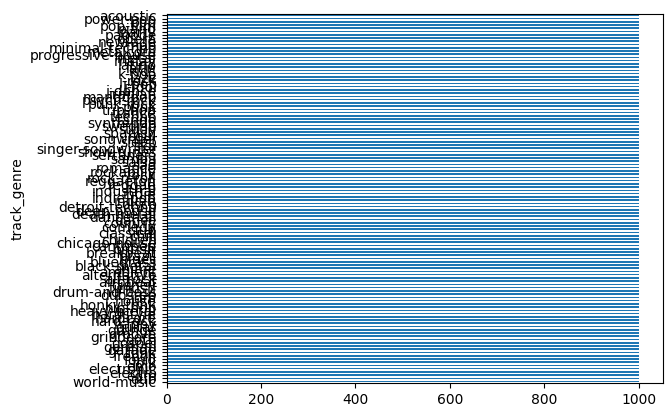

In [55]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
df['track_genre'].value_counts().plot.barh();

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


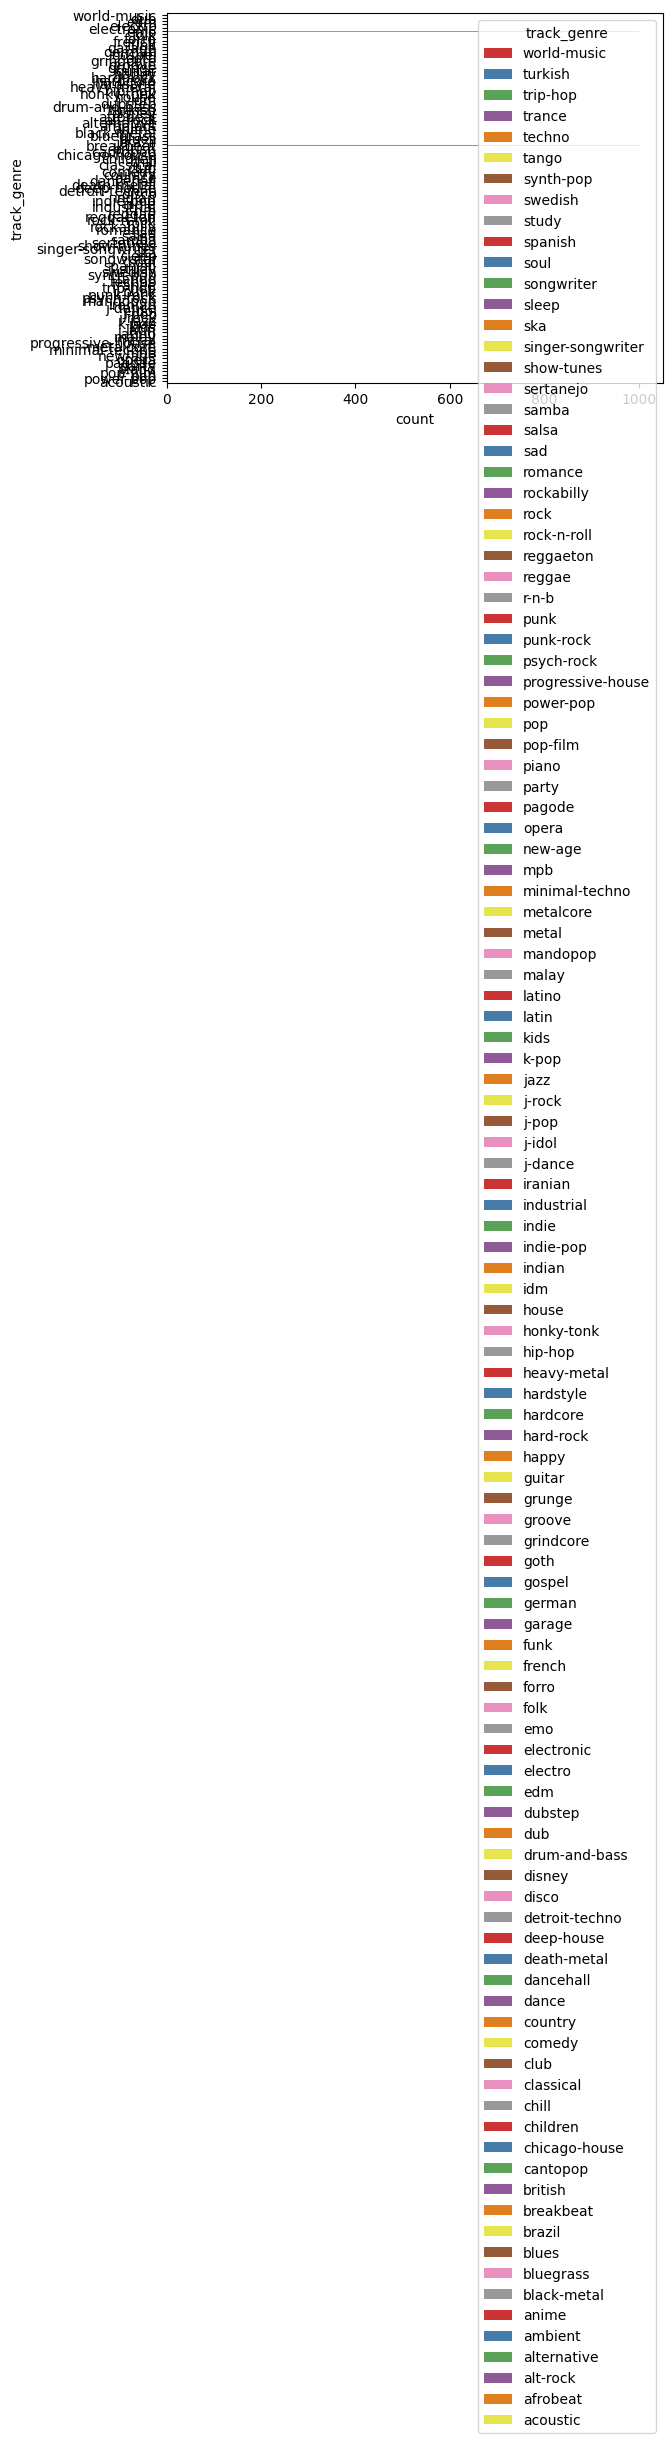

In [56]:
sns.countplot(data = df,
              y = "track_genre",
              hue = "track_genre",
              order = df["track_genre"].value_counts().index,
              palette = "Set1");

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


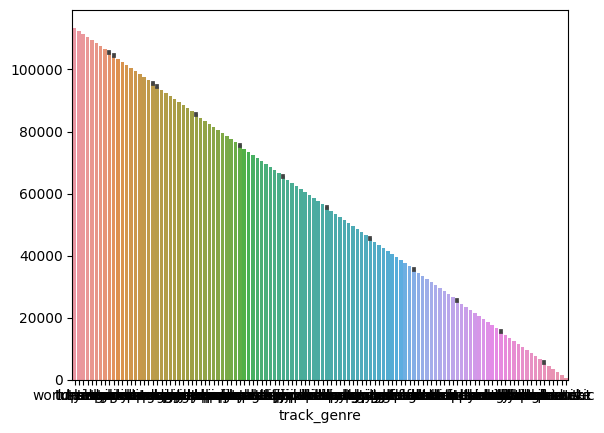

In [57]:
sns.barplot(data = df, x = "track_genre", y = df.track_genre.index);